In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from common.preprocessor import load_data
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# Load dataset
data = load_data('./data','Commodity Prices Monthly.csv')

In [3]:
train_data = pd.read_csv('train_data.csv')

In [4]:
test_data = pd.read_csv('test_data.csv')

In [5]:
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


In [6]:
train_data.columns = ['ds','y']


In [7]:
model= Prophet(interval_width=0.95, seasonality_mode='additive')
model.fit(train_data)

14:36:16 - cmdstanpy - INFO - Chain [1] start processing
14:36:16 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = model.make_future_dataframe(periods=5, freq='MS')
forecast = model.predict(future)
forecast[['ds','yhat']].head()

,ds,yhat
0,2002-01-01,20.166669
1,2002-02-01,22.285146
2,2002-03-01,25.210718
3,2002-04-01,28.211811
4,2002-05-01,29.293543


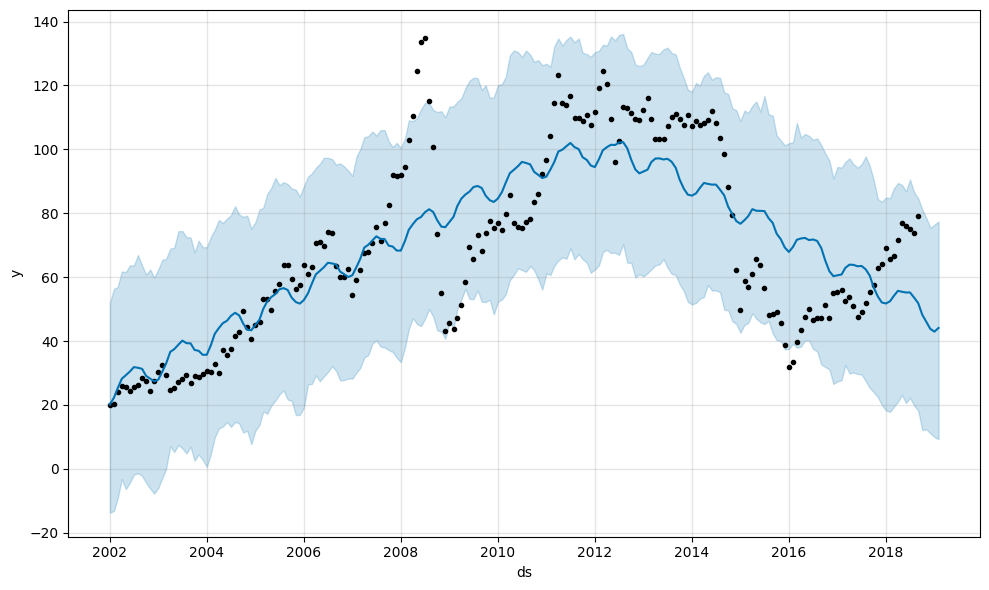

In [9]:
plot = model.plot(forecast)

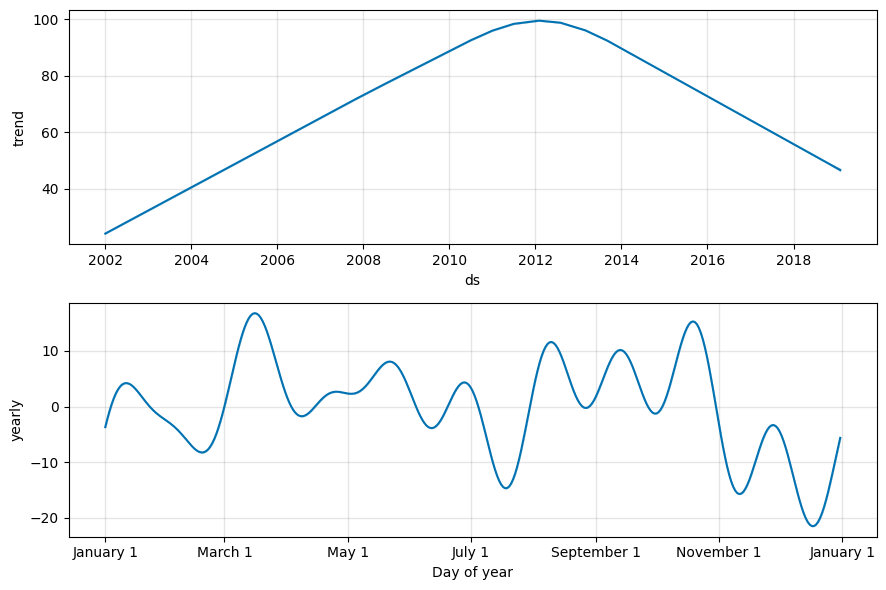

In [10]:
components_plot = model.plot_components(forecast)

In [12]:
test_data.columns =['ds','y']

In [13]:
future = test_data
forecast = model.predict(future)
forecast[['ds','yhat']].head()

,ds,yhat
0,2018-10-01,48.267062
1,2018-11-01,46.025107
2,2018-12-01,43.803249
3,2019-01-01,42.950150
4,2019-02-01,44.105112


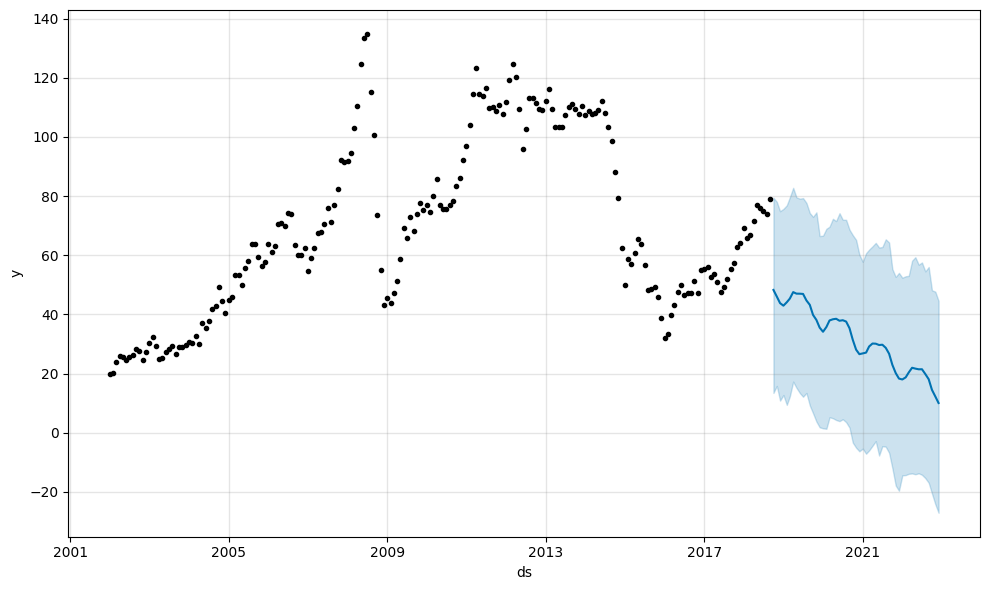

In [14]:
test_plot = model.plot(forecast)

In [15]:
## full dataset 

In [30]:
data

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
247,2022-08-01,97.74
248,2022-09-01,90.57
249,2022-10-01,93.60
250,2022-11-01,90.38


In [31]:
data = pd.read_csv("Prophet data.csv", parse_dates=True)
data.head()

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [32]:
future = data

In [33]:
forecast = model.predict(future)
forecast[['ds','yhat']].head()

,ds,yhat
0,2002-01-01,20.166669
1,2002-02-01,22.285146
2,2002-03-01,25.210718
3,2002-04-01,28.211811
4,2002-05-01,29.293543


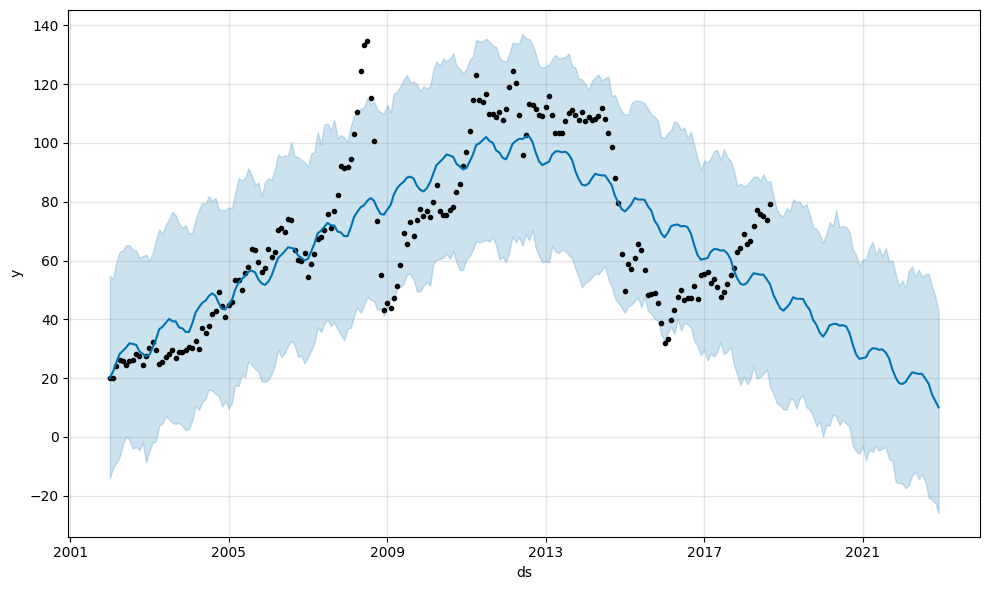

In [34]:
fullplot = model.plot(forecast)